#### Just run the cells sequentially to reproduce the results
#### Make sure the data file has the name 'imdb_top_1000.csv' and is in the same directory as this notebook

## Install Needed Dependency

In [ ]:
!pip install numpy pandas matplotlib

## Reading Data

In [1]:
import pandas as pd

In [2]:
data_path = 'imdb_top_1000.csv'
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 74.3+ KB


In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Cleaning Data

In [4]:
df = df[['Series_Title', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'No_of_Votes', ]]
df.sample()

,Series_Title,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes
464,Dil Bechara,"Comedy, Drama, Romance",7.9,NaN,Mukesh Chhabra,111478


In [5]:
df = df.fillna(df['Meta_score'].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series_Title  1000 non-null   object 
 1   Genre         1000 non-null   object 
 2   IMDB_Rating   1000 non-null   float64
 3   Meta_score    1000 non-null   float64
 4   Director      1000 non-null   object 
 5   No_of_Votes   1000 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 35.2+ KB


## Most Popular Genre

In [7]:
df_genre_splitted = df.copy()

In [8]:
df_genre_splitted['Genre'] = df_genre_splitted['Genre'].str.split(', ')
df_genre_splitted.sample()

,Series_Title,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes
436,Rio Bravo,"[Action, Drama, Western]",8.0,93.0,Howard Hawks,56305


In [9]:
df_genre_flattened = df_genre_splitted.explode('Genre')
df_genre_flattened.head()

,Series_Title,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,2343110
1,The Godfather,Crime,9.2,100.0,Francis Ford Coppola,1620367
1,The Godfather,Drama,9.2,100.0,Francis Ford Coppola,1620367
2,The Dark Knight,Action,9.0,84.0,Christopher Nolan,2303232
2,The Dark Knight,Crime,9.0,84.0,Christopher Nolan,2303232


In [10]:
genre_popularity = df_genre_flattened.groupby(['Genre'])['No_of_Votes'].sum().sort_values(ascending=False)
# Genre's poplarity is the number of ratings its films have (since we have no access to number of views).
genre_popularity.head()

Genre
Drama        174288286
Adventure     83290779
Action        76388586
Crime         58796324
Comedy        52533570
Name: No_of_Votes, dtype: int64

In [11]:
most_popular_genre = genre_popularity.iloc[[0]].index[0]
f'The most popular genre is {most_popular_genre}.'
# the most popular genre is the genre that has the most ratings

'The most popular genre is Drama.'

## Number of Shows in Each Genre

In [12]:
genre_no_movies = df_genre_flattened.groupby(['Genre'])['Series_Title'].count()
genre_no_movies.sort_values(ascending=False)

Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: Series_Title, dtype: int64

## Number of Shows by Genre Bar Chart

In [13]:
import matplotlib.pyplot as plt
import numpy as np

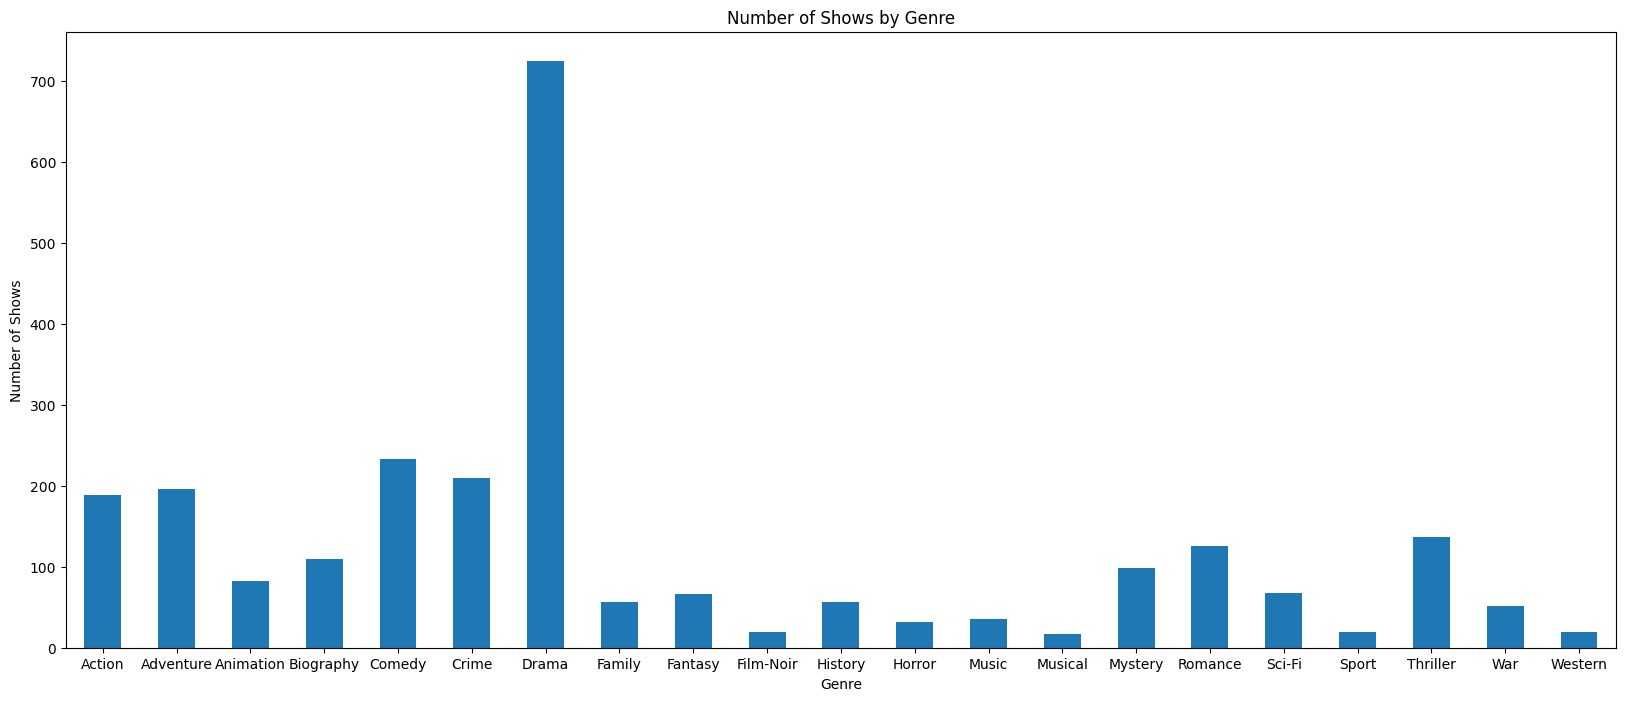

In [14]:
positions = np.arange(len(genre_no_movies))*4
bar_width = 2

fig, genre_plt = plt.subplots(figsize=(20, 8))
genre_plt.bar(positions, genre_no_movies.values, width = bar_width)

# Add labels and title
genre_plt.set_xlabel('Genre')
genre_plt.set_ylabel('Number of Shows')
genre_plt.set_title('Number of Shows by Genre')

genre_plt.set_xticks(positions, genre_no_movies.index)
genre_plt.set_xlim([-bar_width, max(positions) + bar_width])

plt.show()

## Number of Shows by Director

In [15]:
director_no_shows = df.groupby('Director')['Series_Title'].count().sort_values()
director_no_shows

Director
Aamir Khan              1
Mikael Håfström         1
Michel Hazanavicius     1
Michel Gondry           1
Michael Radford         1
                       ..
Akira Kurosawa         10
Martin Scorsese        10
Hayao Miyazaki         11
Steven Spielberg       13
Alfred Hitchcock       14
Name: Series_Title, Length: 548, dtype: int64

In [16]:
top_director_by_no_shows = director_no_shows.iloc[-1:].index[0]
f'The director with the highest number of shows is {top_director_by_no_shows}.'

'The director with the highest number of shows is Alfred Hitchcock.'

## Number of Shows by Director Bar Chart

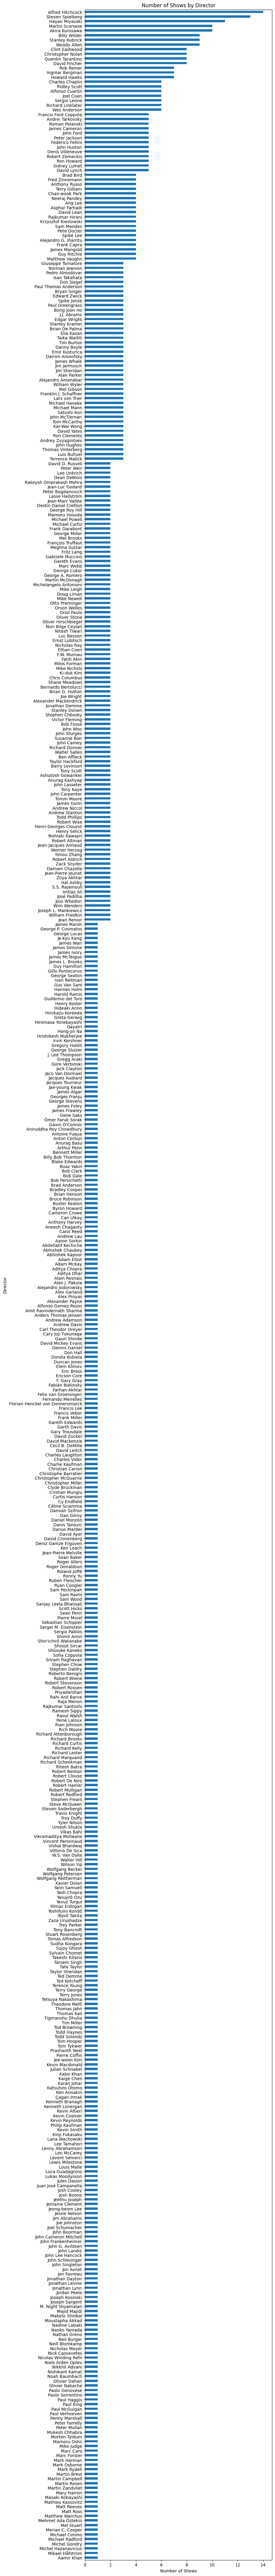

In [17]:

fig, director_plt = plt.subplots(figsize=(8, 110))

positions = np.arange(len(director_no_shows))*3.5
bar_thickness = 1.75

director_plt.barh(positions, director_no_shows.values, height=bar_thickness)

# Add labels and title
director_plt.set_ylabel('Director')
director_plt.set_xlabel('Number of Shows')
director_plt.set_title('Number of Shows by Director')

director_plt.set_yticks(positions, director_no_shows.index)
director_plt.set_ylim([-bar_thickness, max(positions) + bar_thickness])

plt.show()

## Analysis and Findings

The most popular genre by far is Drama as it has the highest number of shows (almost double the number of shows of the 2nd most popular genre) and the shows have the highest number of votes.

Comedy has the 2nd highest number of shows but surprisingly it's the 5th in terms of number of ratings. almost half the number of votes on adventure. I found 2 explanations for this:
* Comedy shows' fans don't care much about rating shows. 
* Comedy is not as popular amongst views as it may seem, it's just that there are alot of comedy shows. this is possibly because production of comedy shows is cheap as there isn't much edditing and scene preperations needed to produce them.